# preAyudantía 4: Z-test y T-test

En este Google Colab podrán encontrar diferentes ejemplos de como realizar test de hipótesis sobre la media -o mediana- de muestras.  

<a target="_blank" href="https://colab.research.google.com/github/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Ayudantias/PreAyudantia4_Ztest_y_Ttest.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install numpy -q
!pip install scipy -q
!pip install statsmodels -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install pandas -q

# Z-test

El z-test es un test sobre la media que se caracteriza por ser estricto en sus supuestos. Este asume
- Varianza conocida
- Independencia de muestras
- Normalidad de los datos y n≥30

En este test estamos comparando dos poblaciones.



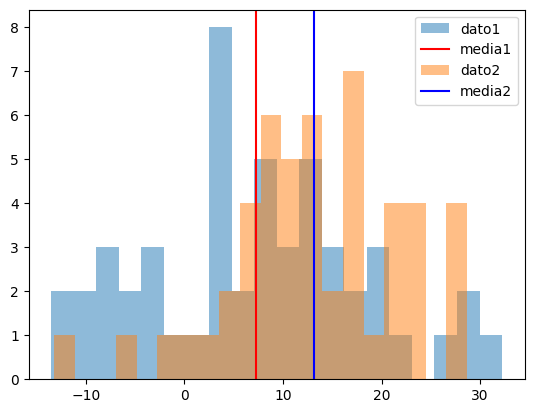

z-crítico:  -2.1657446473386077
p-value:  0.015165352622095353


In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
np.random.seed(42)
def ztest_course(dato1, dato2, pop_var1 = 1, pop_var2 = 1, significance = 0.05 ,alternative = 'two-sided'):
    '''
    Z-test para comparar dos poblaciones.
    Este test asume varianzas poblacionales conocidas, que las muestras son independientes
    y siguen una distribución normal.
    ---
    Parámetros:
        dato1 : array_like
            Primera muestra de datos.
        dato2 : array_like
            Segunda muestra de datos.
        pop_var1 : float, optional
            Varianza poblacional de la primera muestra. Por defecto es 1.
        pop_var2 : float, optional
            Varianza poblacional de la segunda muestra. Por defecto es 1.
        significance : float, optional
            Nivel de significancia para el test. Por defecto es 0.05.
        alternative : str, optional
            Tipo de test de hipótesis a realizar. Puede ser 'two-sided', 'larger' o 'smaller'.
            Por defecto es 'two-sided'.

    Retorna:
        z : float
            Valor del estadístico z.
        p_value : float
            Valor p del test.
    '''
    mean1 = np.mean(dato1)
    mean2 = np.mean(dato2)

    n1 = len(dato1)
    n2 = len(dato2)


    z = (mean1 - mean2)/ np.sqrt(pop_var1/n1 + pop_var2/n2)

    if alternative == 'two-sided':
        p_value = 2 * (1 - st.norm.cdf(np.abs(z)))
    elif alternative == 'larger':
        p_value = 1 - st.norm.cdf(z)
    elif alternative == 'smaller':
        p_value = st.norm.cdf(z)
    else:
        raise ValueError("El valor de 'alternative' debe ser 'two-sided', 'larger' o 'smaller'.")

    return z, p_value,


# comparamos los datos
# datos
dato1 = np.random.normal(
    loc = 10,
    scale = 12,
    size = 50)
dato2 = np.random.normal(
    loc = 13,
    scale = 10,
    size = 50
)

var1 = 12**2
var2 = 15**2

z, p_value = ztest_course(dato1, dato2, pop_var1 = var1, pop_var2 = var2, significance = 0.05 ,alternative = 'smaller')
fig, ax = plt.subplots()
ax.hist(dato1, bins = 20, alpha = 0.5, label = 'dato1')
ax.axvline(np.mean(dato1), color = 'red', label = 'media1')
ax.hist(dato2, bins = 20, alpha = 0.5, label = 'dato2')
ax.axvline(np.mean(dato2), color = 'blue', label = 'media2')
ax.legend()
plt.show()
print('z-crítico: ', z)
print('p-value: ', p_value)


# T-test

El t-test es una relajación del supuesto de varianza conocida del z-test. En particular se utiliza la varianza de la muestra para realizar los cálculos. Así, los supuestos que se tienen son:
- Independencia de muestras
- (casi)Normalidad de los datos. N puede ser < 30.

---
Documentación:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp


In [3]:


np.random.seed(42)
dato1 = np.random.normal(
    loc = 10,
    scale = 12,
    size = 50)
dato2 = np.random.normal(
    loc = 13,
    scale = 10,
    size = 50
)
# En este caso se utiliza ttest_ind de scipy
ttest = st.ttest_ind(dato1, dato2,
                     equal_var = False,# asumimos que las varianzas no son iguales
                     alternative = 'two-sided' # µ1 ≠ µ2
                     )
print(f't-crítico: { ttest[0]:.2f}')
print(f'p-value: { ttest[1]:.2e}')
print(f'Grados de libertas{ ttest.df:.2f}')
### Y también podemos obtener los intervalos de confianza.

ci_95 = ttest.confidence_interval(0.95)
print(f'Intervalo de confianza: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]' ) # Notar que es un intervalo de confianza para la diferencia

t-crítico: -2.93
p-value: 4.30e-03
Grados de libertas92.53
Intervalo de confianza: [-9.87, -1.89]


## T-test pareado

El t-test puede también aplicarse a casos donde ambas muestras no necesariamente son independientes. Es decir, sirven para comparar poblaciones que pueden estar relacionadas, o los datos fueron tomados en pares. En estos casos, por lo general los datos están correlacionados, por lo cual no existe independencia entre ellos.
Entonces, en este test, solamente asumimos:
- Datos (casi)Normales
---

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [4]:
np.random.seed(42)
dato1 = np.random.normal(loc = 3, scale = 2, size = 50)
dato2 = dato1 +  np.random.normal(loc = 0.9, scale = 5, size = 50)

rel_ttest = st.ttest_rel(dato1, dato2, alternative = 'two-sided')
print(f't-crítico: { rel_ttest[0]:.2f}')
print(f'p-value: { rel_ttest[1]:.2e}')
print(f'Grados de libertad: { rel_ttest.df:.2f}')

# intervalos de confianza
ci_95 = rel_ttest.confidence_interval(0.95)
print(f'Intervalo de confianza: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]' )


t-crítico: -1.60
p-value: 1.16e-01
Grados de libertad: 49.00
Intervalo de confianza: [-2.23, 0.25]


# propTest
Los test de proporción se basan en realizar test sobre la proporción o porcentaje de ciertas variables. Este tipo de tests son adaptaciones de los z-test y t-test para variables binarias.

Este test se basa en la aproximación de una distribución
Binomial a una Normal.

En estos casos es más sencillo aplicar los test t-test y z-test -teniendo precausión en los supuestos. Recordando que:

$$
E[X] = \sum_{i=1}^n \frac{x_i}{n}
$$
Y si $X\sim Ber(p)$
$$
E[X] = \sum_{i=1}^n \frac{x_i}{n} = \frac{1}{n}\sum_{i=1}^n \mathbf{1}_{x_i = 1} = p
$$
Así, el promedio de una variable binaría equivale a su propoción o "probabilidad".

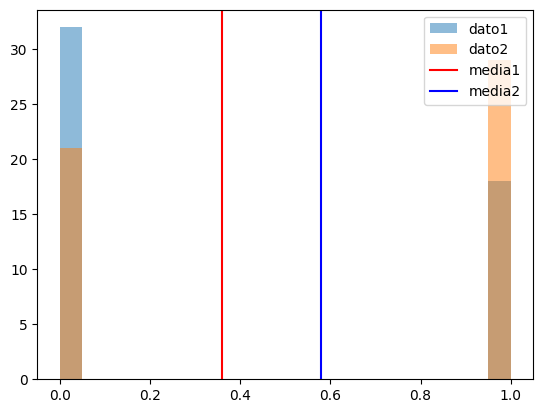

In [5]:
np.random.seed(42)
dato_1 = np.random.binomial(n = 1, p = 0.45, size = 50)
dato_2 = np.random.binomial(n = 1, p = 0.6, size = 50)
### Exploramos
fig, ax = plt.subplots()
ax.hist(dato_1, bins = 20, alpha = 0.5, label = 'dato1')
ax.hist(dato_2, bins = 20, alpha = 0.5, label = 'dato2')
ax.axvline(np.mean(dato_1), color = 'red', label = 'media1')
ax.axvline(np.mean(dato_2), color = 'blue', label = 'media2')
ax.legend()
plt.show()

In [6]:
# Este test puede ser realizado mediante ttest_ind
ttest_prop = st.ttest_ind(dato_1, dato_2,  alternative = 'less', equal_var = False)
print(f't-crítico: { ttest_prop[0]:.2f}')
print(f'p-value: { ttest_prop[1]:.2e}')
print(f'Grados de libertad: { ttest_prop.df:.2f}')

t-crítico: -2.24
p-value: 1.38e-02
Grados de libertad: 97.92


# Tests No paramétricos
Los test no paramétricos son útiles para distribuciones que escapan de una distribución normal. Así, podemos relajar el supuesto de normalidad de los datos. La desventaja de dichos test es que son de bajo poder comparado a los demás test paramétricos.

## Sign Test
Fuente: https://www.geeksforgeeks.org/sign-test-in-r/

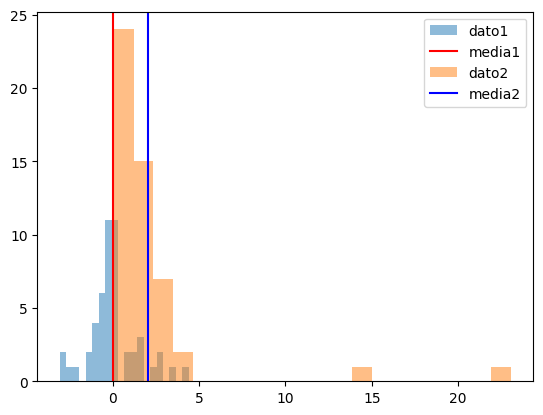

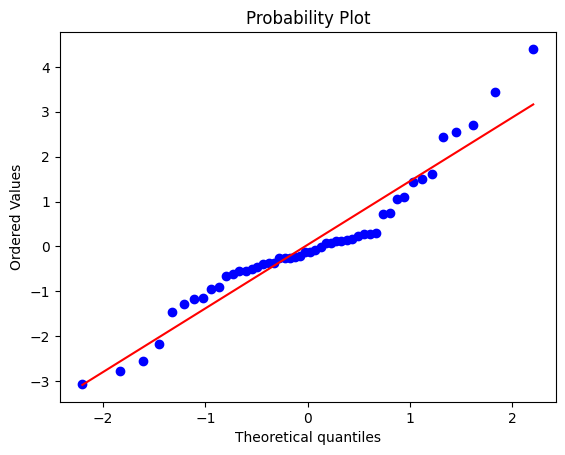

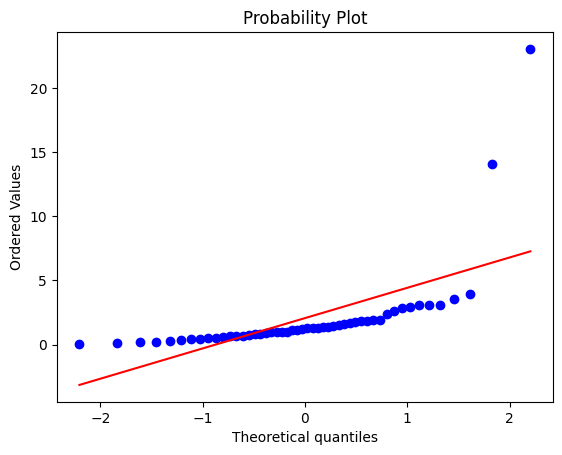

In [24]:

dato1 = np.random.laplace(size = 50)
dato2 = np.random.lognormal(size = 50)


fig, ax = plt.subplots()
ax.hist(dato1, bins = 20, alpha = 0.5, label = 'dato1')
ax.axvline(np.mean(dato1), color = 'red', label = 'media1')
ax.hist(dato2, bins = 20, alpha = 0.5, label = 'dato2')
ax.axvline(np.mean(dato2), color = 'blue', label = 'media2')
ax.legend()
plt.show()
st.probplot(dato1, plot = plt)
plt.show()
st.probplot(dato2, plot = plt)
plt.show()


In [25]:
# signed test
# En este caso utilizamos un test binomial para aproximar

def sign_test(data, mu0=0, alternative='two-sided'):
    # positivos
    pos = np.sum(data > mu0)
    # negativos
    neg = np.sum(data < mu0)
    n = pos + neg
    if n == 0: # empates
        return 1.0

    # binom test
    signed = st.binomtest(pos, n, p=0.5, alternative=alternative)

    return signed

# este test es de una muestra así que se trata como es
sign_test = sign_test(dato1, mu0=np.mean(dato2), alternative='two-sided')
print(f'p-value: { sign_test.pvalue:.2e}')
print(f'statistic: { sign_test.statistic}')


p-value: 4.21e-09
statistic: 0.1


## Wilcoxon Signed-Rank test

Este tipo de test se utiliza para comparar dos muestras de datos simétricas. Y permite corroborar si dos datos provienen de una misma distribución al comparar la diferencia de estos.

Al tratarse sobre distribuciones paramétricas, la hipótesis nula se realiza sobre la media.
---
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [26]:
# diferencia
wil = st.wilcoxon(dato1, dato2, alternative='two-sided')
print(f'p-value: { wil.pvalue:.2e}')
print(f'statistic: { wil.statistic}')

p-value: 7.72e-07
statistic: 160.0


## Mann-Whitney U test

Este test se utiliza como una extensión del *Sign Test* debido a que permite comparar dos muestras desde su localización, la cual no necesariamente es la media. Así, existe una manera de utilizarlo para distribuciones no necesariamente simétricas.

---
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu

In [ ]:
mannU = st.mannwhitneyu(dato1, dato2, alternative='two-sided')
print(f'p-value: { mannU.pvalue:.2e}')
print(f'statistic: { mannU.statistic}')